In [ ]:
#Do not edit or change this cell
import pandas as pd
import duckdb
import matplotlib
import requests
from IPython.core.magic import (register_cell_magic, Magics, magics_class, cell_magic)

!wget -nc --no-verbose "https://github.com/arezzy17/AdvancedAnalytics_BUS325/raw/main/brazilecommerce.duckdb"
conn = duckdb.connect("brazilecommerce.duckdb")

@magics_class
class DuckDBMagics(Magics):
    def __init__(self, shell):
        super(DuckDBMagics, self).__init__(shell)
        self.conn = conn

    @cell_magic
    def duckdb(self, line, cell):
        # Execute the cell content as DuckDB query
        result = self.conn.execute(cell).fetchdf()
        return result

# Register the magic with the current IPython shell
ip = get_ipython()
ip.register_magics(DuckDBMagics)

2024-12-10 21:58:24 URL:https://raw.githubusercontent.com/arezzy17/AdvancedAnalytics_BUS325/main/brazilecommerce.duckdb [30945280/30945280] -> "brazilecommerce.duckdb" [1]


In [ ]:
conn = duckdb.connect("brazilecommerce.duckdb")
sql_query ="""
SELECT
  c.customer_state,
  AVG(julian(o.order_delivered_customer_date) - julian(o.order_purchase_timestamp)) AS avg_delivery_time
FROM
  Orders o
JOIN
  Customers c ON o.customer_id = c.customer_id
  GROUP BY c.customer_state
ORDER BY
  avg_delivery_time DESC;
"""
Customers = conn.execute(sql_query).fetchdf()
Customers.drop_duplicates(keep='last', inplace=True)
Customers.drop_duplicates(keep=False, inplace=True)

Customers

,customer_state,avg_delivery_time
0,RR,29.387546
1,AP,27.185068
2,AM,26.425991
3,AL,24.543855
4,PA,23.772917
5,MA,21.572976
6,SE,21.519788
7,CE,21.266579
8,AC,21.035713
9,PB,20.426768


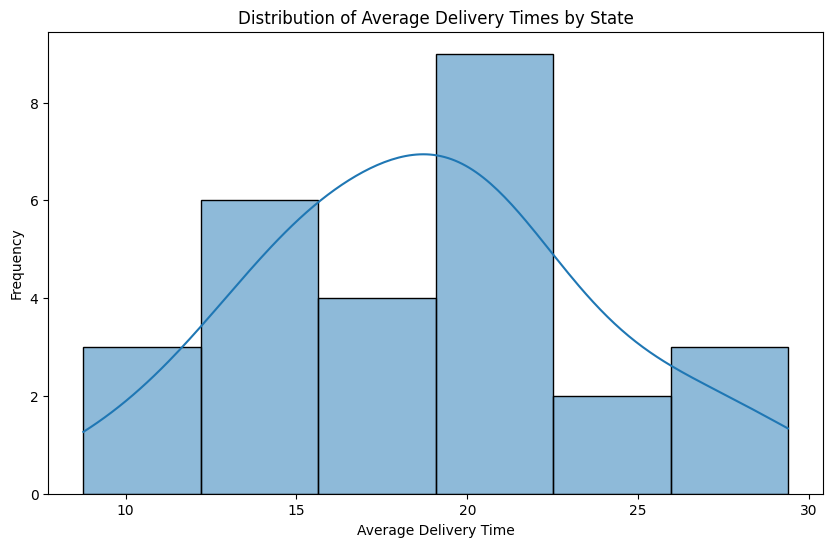

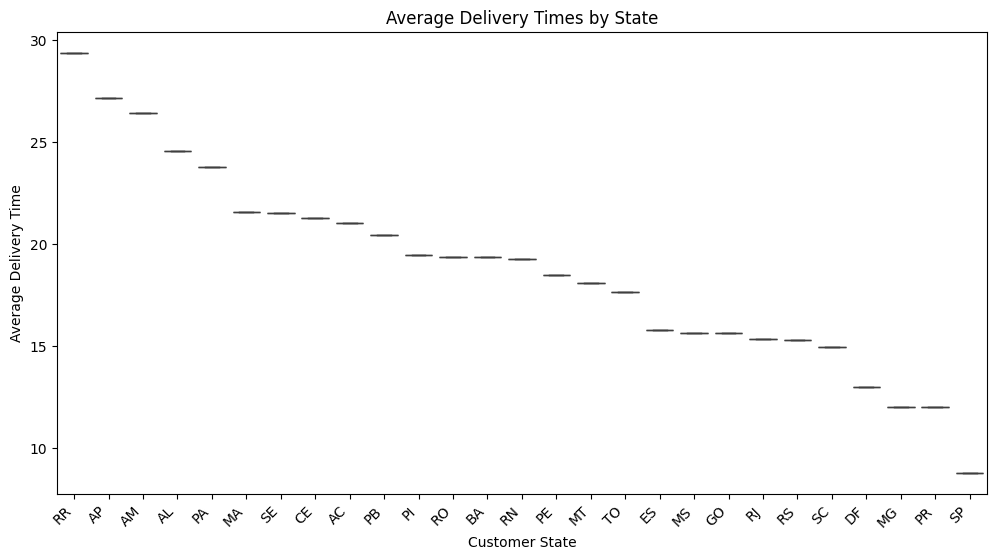

In [ ]:
#Multivariate graphical EDA for the code above

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Distribution of Average Delivery Times
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(Customers['avg_delivery_time'], kde=True)
plt.title('Distribution of Average Delivery Times by State')
plt.xlabel('Average Delivery Time')
plt.ylabel('Frequency')
plt.show()

# Boxplot of Average Delivery Times by State
plt.figure(figsize=(12, 6))
sns.boxplot(x='customer_state', y='avg_delivery_time', data=Customers)
plt.title('Average Delivery Times by State')
plt.xlabel('Customer State')
plt.ylabel('Average Delivery Time')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
import duckdb

conn = duckdb.connect("brazilecommerce.duckdb")

sql_query = """
SELECT
  p.product_weight_g,
  AVG(julian(o.order_delivered_customer_date) - julian(o.order_purchase_timestamp)) AS avg_days_took_to_deliver
FROM Products AS p
LEFT JOIN Order_Items AS oi ON p.product_id = oi.product_id
LEFT JOIN Orders AS o ON oi.order_id = o.order_id
GROUP BY p.product_weight_g
ORDER BY avg_days_took_to_deliver DESC
"""

Products = conn.execute(sql_query).fetchdf()

Products['product_weight_g'] = Products['product_weight_g'].fillna(Products['product_weight_g'].mean())
Products['avg_days_took_to_deliver'] = Products['avg_days_took_to_deliver'].fillna(Products['avg_days_took_to_deliver'].mean())

Products = Products.drop_duplicates(subset=['product_weight_g'], keep='first')

print(Products)

      product_weight_g  avg_days_took_to_deliver
0               3462.0                 64.866076
1               1040.0                 56.413898
2              27400.0                 50.331088
3              19425.0                 50.166181
4                948.0                 49.246742
...                ...                       ...
2200           12667.0                 12.671216
2201            1620.0                 12.671216
2202             989.0                 12.671216
2203            1349.0                 12.671216
2204            3533.0                 12.671216

[2205 rows x 2 columns]


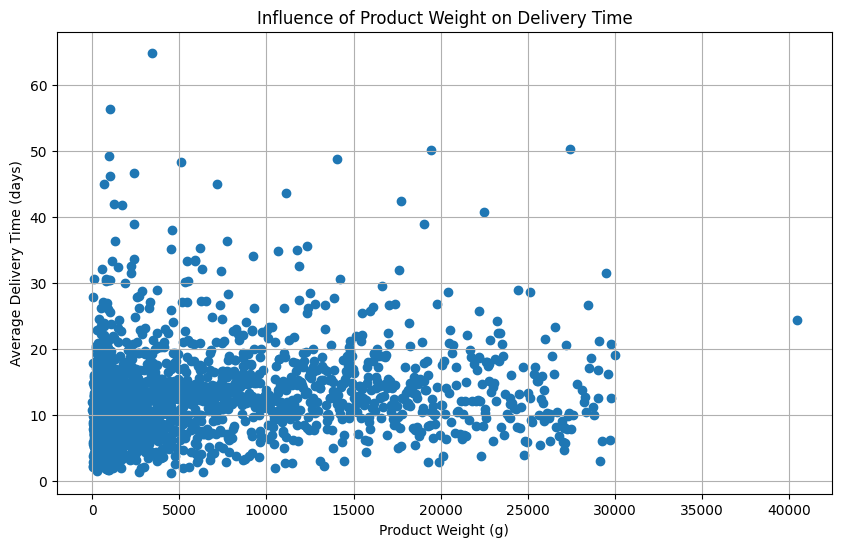

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(Products['product_weight_g'], Products['avg_days_took_to_deliver'])
plt.xlabel('Product Weight (g)')
plt.ylabel('Average Delivery Time (days)')
plt.title('Influence of Product Weight on Delivery Time')
plt.grid(True)
plt.show()

In [ ]:
conn = duckdb.connect("brazilecommerce.duckdb")
sql_query ="""
SELECT
seller_state,
Count(seller_id) AS seller_count
FROM Sellers
GROUP BY seller_state
ORDER BY seller_count DESC
"""

Sellers = conn.execute(sql_query).fetchdf()

Sellers.fillna('Unknown', inplace=True)
Sellers.replace('', 'Unknown', inplace=True)


Sellers['seller_state'] = Sellers['seller_state'].str.upper()

Sellers.drop_duplicates(subset=['seller_state', 'seller_count'], keep='first', inplace=True)

print(Sellers)

   seller_state  seller_count
0            SP          1849
1            PR           349
2            MG           244
3            SC           190
4            RJ           171
5            RS           129
6            GO            40
7            DF            30
8            ES            23
9            BA            19
10           CE            13
11           PE             9
12           PB             6
13           RN             5
14           MS             5
15           MT             4
16           RO             2
17           SE             2
18           AC             1
19           PI             1
20           MA             1
21           AM             1
22           PA             1


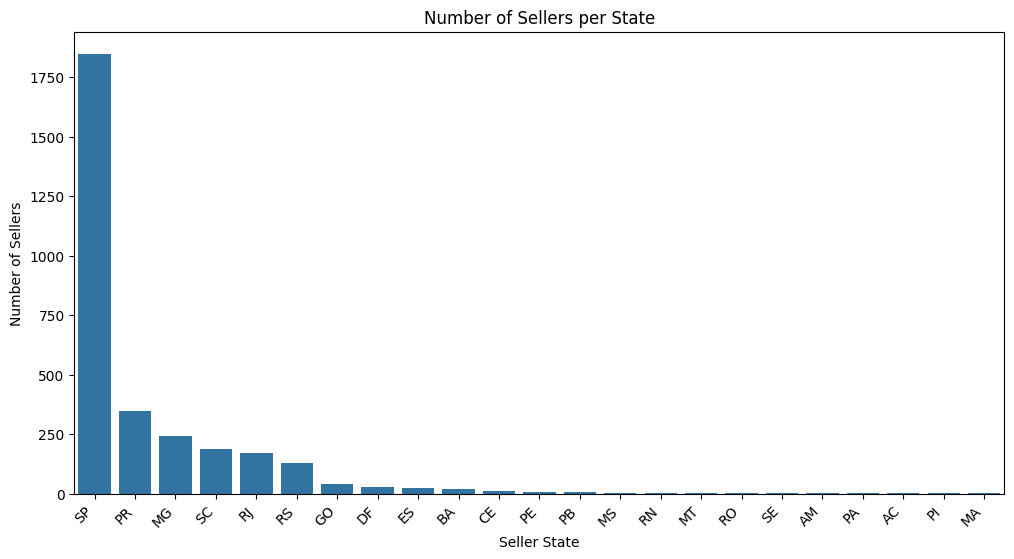

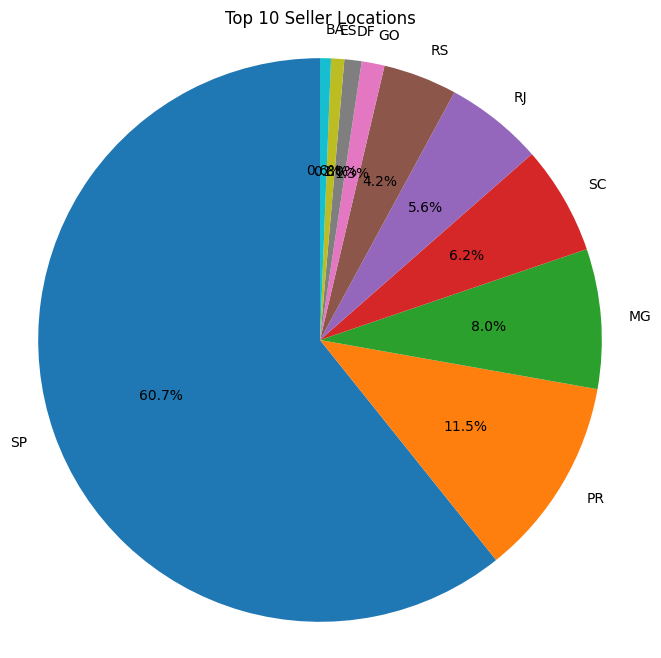

In [ ]:
# prompt: Univariate graphical EDA for the code above

import matplotlib.pyplot as plt
import seaborn as sns
import duckdb # Importing duckdb

# Assuming 'Sellers' DataFrame is already created from the SQL query in the previous code.
# Re-executing the query to ensure 'Sellers' is defined in this scope
conn = duckdb.connect("brazilecommerce.duckdb") # Establishing connection
sql_query ="""
SELECT
seller_state,
Count(seller_id) AS seller_count
FROM Sellers
GROUP BY seller_state
ORDER BY seller_count DESC
"""

Sellers = conn.execute(sql_query).fetchdf() # Executing the query and storing in 'Sellers' DataFrame

Sellers.fillna('Unknown', inplace=True)
Sellers.replace('', 'Unknown', inplace=True)


Sellers['seller_state'] = Sellers['seller_state'].str.upper()

Sellers.drop_duplicates(subset=['seller_state', 'seller_count'], keep='first', inplace=True)


# Bar plot for seller locations
plt.figure(figsize=(12, 6))
sns.barplot(x='seller_state', y='seller_count', data=Sellers)
plt.title('Number of Sellers per State')
plt.xlabel('Seller State')
plt.ylabel('Number of Sellers')
plt.xticks(rotation=45, ha='right')
plt.show()

# Pie chart for seller locations (top 10 states)
top_10_sellers = Sellers.nlargest(10, 'seller_count')
plt.figure(figsize=(8, 8))
plt.pie(top_10_sellers['seller_count'], labels=top_10_sellers['seller_state'], autopct='%1.1f%%', startangle=90)
plt.title('Top 10 Seller Locations')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()